# Import Library

In [ ]:
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

### Declare PATH for TRAIN AND TEST

In [184]:
DATA_DIR = "D:/DLProject/hello1/training_set"
CATERGORIES = ['cats','dogs']
IMAGE_SIZE = 50

### Load dataset

In [185]:
def create_training_data():
    training_date = []
    for categories in CATERGORIES:
        path = os.path.join(DATA_DIR,categories)
        class_num = CATERGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                training_date.append([new_array,class_num])
            except:
                pass
    return training_date

### convert list to np ndarray

In [186]:
data = np.asarray(create_training_data())

In [187]:
x_data = []
y_data = []

for x in data:
    x_data.append(x[0])
    y_data.append(x[1])

### Normalize image

In [188]:
x_data_np = np.asarray(x_data)/255.0
y_data_np = np.asarray(y_data)

### Store the data in pickle file

In [189]:
pickle_out = open('x_data_np','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

In [190]:
pickle_out = open('y_data_np','wb')
pickle.dump(y_data_np,pickle_out)
pickle_out.close()

### Load the data set which is ND array

In [191]:
X_Temp = open('x_data_np','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_np','rb')
y_data_np = pickle.load(Y_Temp)

In [192]:
x_data_np = x_data_np.reshape(-1, 50, 50, 1)

In [193]:
data1 = len(x_data)
print(data1)
data2 = len(y_data)
print(data2)


8005
8005


In [194]:
x_data_np.shape[1:]

(50, 50, 1)

In [195]:
x_data_np.shape

(8005, 50, 50, 1)

### Perform train test split

In [196]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.3,random_state=101)

In [197]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(5603, 50, 50, 1)
(2402, 50, 50, 1)
(5603,)
(2402,)


### our model using a simple CNN

In [198]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 16
epochs = 10

img_rows = X_Train[0].shape[0]
img_cols = X_Train[1].shape[0]
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)         

In [199]:
input_shape

(50, 50, 1)

In [200]:
history = model.fit(X_Train, Y_Train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_Test, Y_Test),
          shuffle=True)

model.save("cats_vs_dogs_V1.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(X_Test, Y_Test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 5603 samples, validate on 2402 samples
Epoch 1/10
5603/5603 [==============================] - 10s 2ms/step - loss: 0.6895 - accuracy: 0.5413 - val_loss: 0.6661 - val_accuracy: 0.6299
Epoch 2/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.6570 - accuracy: 0.6182 - val_loss: 0.6553 - val_accuracy: 0.6245
Epoch 3/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.6167 - accuracy: 0.6659 - val_loss: 0.6069 - val_accuracy: 0.6719
Epoch 4/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.5772 - accuracy: 0.6993 - val_loss: 0.7371 - val_accuracy: 0.6232
Epoch 5/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.5458 - accuracy: 0.7275 - val_loss: 0.5610 - val_accuracy: 0.7069
Epoch 6/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.5192 - accuracy: 0.7466 - val_loss: 0.5500 - val_accuracy: 0.7277
Epoch 7/10
5603/5603 [==============================] - 9s 2ms/step - loss: 0.4954 - ac

In [133]:
IMAGE_SIZE

50

### Test

In [201]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

In [202]:
model = tf.keras.models.load_model('cats_vs_dogs_V1.h5')

#### Lets give a image to Test

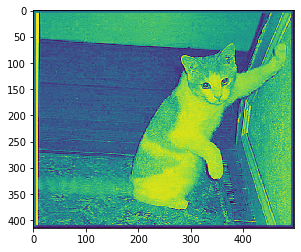

In [203]:
filepath = 'D:/DLProject/hello1/test_set/cats/cat.4001.jpg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array)

In [204]:
test = model.predict([prepare(filepath='D:/DLProject/hello1/test_set/cats/cat.4008.jpg')])

In [205]:
print(CATERGORIES[int(test[0][0])])

cats


# Plotting our Loss and Accuracy Graphs

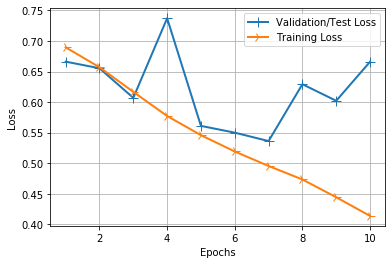

In [210]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

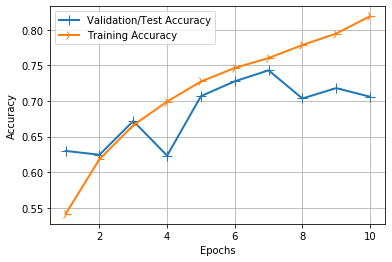

In [213]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()